<a href="https://colab.research.google.com/github/hecshzye/food-or-not-model/blob/main/computer_vision_cnn_multi_class_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network and Computer Vision with TensorFlow (Multi-class)


This is a practice and rough work notebook for the upcoming CNN & Computer Vision projects (food-or-not)
If something from this practice notebook looks meaningful or helpful, please do not hesitate to work on it or experiment further

Working with the food-101 dataset from Kaggle - https://www.kaggle.com/dansbecker/food-101

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Importing the dataset with 10 classes (Pre-processed from the original Kaggle food-101 dataset)
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN-Computer-vision-data/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"Directories: {len(dirnames)} and {len(filenames)} images in '{dirpath}'.")

Directories: 2 and 0 images in '10_food_classes_all_data'.
Directories: 10 and 0 images in '10_food_classes_all_data/train'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/pizza'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/hamburger'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/chicken_curry'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/ice_cream'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/fried_rice'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/ramen'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/chicken_wings'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/sushi'.
Directories: 0 and 750 images in '10_food_classes_all_data/train/steak'.
Directories: 10 and 0 images in '10_food_classes_all_data/test'.
Directories: 0 and 250 images in '10_food_

In [4]:
# train & test splits
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names= np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


## Preprocessing the data

In [6]:
# Function to view images at random
import matplotlib.image as mpimg
import random
def random_image_show(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Shape of the image: {img.shape}")
  return img

Shape of the image: (512, 512, 3)


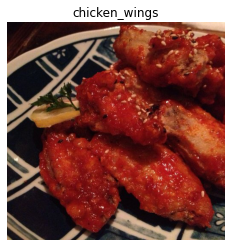

In [16]:
img = random_image_show(target_dir=train_dir,
                        target_class=random.choice(class_names)) #YUM 😋

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen = ImageDataGenerator(rescale=1/225.)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Modelling

In [10]:
from tensorflow.keras.layers import MaxPool2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential

model_1 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 64s 233ms/step - loss: 2.2222 - accuracy: 0.1648 - val_loss: 2.1458 - val_accuracy: 0.2052
Epoch 2/5
235/235 [==============================] - 54s 232ms/step - loss: 1.9479 - accuracy: 0.3200 - val_loss: 1.9309 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 55s 233ms/step - loss: 1.5688 - accuracy: 0.4681 - val_loss: 2.1310 - val_accuracy: 0.2956
Epoch 4/5
235/235 [==============================] - 55s 233ms/step - loss: 0.9746 - accuracy: 0.6772 - val_loss: 2.5291 - val_accuracy: 0.2760
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.4351 - accuracy: 0.8644 - val_loss: 3.3871 - val_accuracy: 0.2568


**Trained** on the Google's Backend **GPU**

### Evaluation

In [11]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 3.3871 - accuracy: 0.2568


[3.3870902061462402, 0.25679999589920044]

In [19]:
# Function top plot loss curves
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

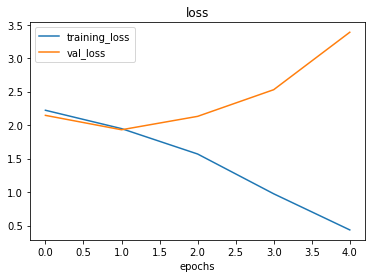

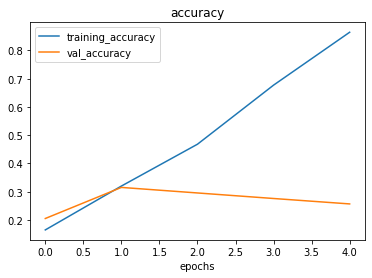

In [20]:
plot_loss_curves(history_1)

Model_1 is overfitting during the training

In [21]:
# Trying data augmentation to reduce overfitting
train_datagen_aug = ImageDataGenerator(rescale=1/225.,
                                       rotation_range=20,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True,
                                       zoom_range=0.2)
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [23]:
# Modelling the augmented data
model_2 = tf.keras.models.clone_model(model_1)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2 = model_2.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 128s 543ms/step - loss: 2.2721 - accuracy: 0.1399 - val_loss: 2.1895 - val_accuracy: 0.2052
Epoch 2/5
235/235 [==============================] - 126s 538ms/step - loss: 2.1533 - accuracy: 0.2227 - val_loss: 2.0071 - val_accuracy: 0.2740
Epoch 3/5
235/235 [==============================] - 124s 529ms/step - loss: 2.0874 - accuracy: 0.2561 - val_loss: 1.9680 - val_accuracy: 0.2924
Epoch 4/5
235/235 [==============================] - 124s 527ms/step - loss: 2.0349 - accuracy: 0.2833 - val_loss: 2.0127 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 124s 527ms/step - loss: 2.0046 - accuracy: 0.3029 - val_loss: 1.8507 - val_accuracy: 0.3516


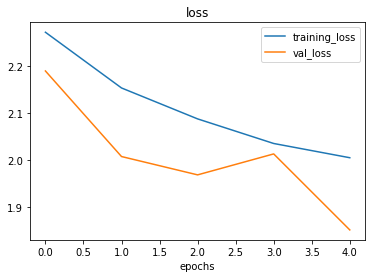

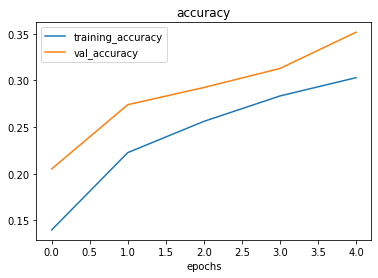

In [24]:
plot_loss_curves(history_2)

In [25]:
# Trying out another model for improved accuracy & then augmenting it
model_3 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")
])
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 202ms/step - loss: 2.2660 - accuracy: 0.1969 - val_loss: 2.0091 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 48s 203ms/step - loss: 1.9059 - accuracy: 0.3315 - val_loss: 1.9179 - val_accuracy: 0.3396
Epoch 3/5
235/235 [==============================] - 48s 203ms/step - loss: 1.6758 - accuracy: 0.4333 - val_loss: 1.8648 - val_accuracy: 0.3552
Epoch 4/5
235/235 [==============================] - 48s 204ms/step - loss: 1.3124 - accuracy: 0.5707 - val_loss: 1.9942 - val_accuracy: 0.3240
Epoch 5/5
235/235 [==============================] - 48s 203ms/step - loss: 0.8232 - accuracy: 0.7476 - val_loss: 2.3028 - val_accuracy: 0.3020


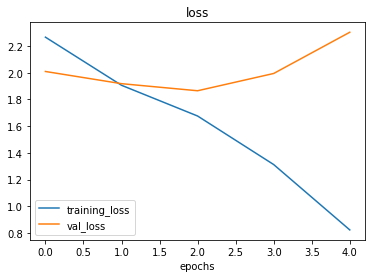

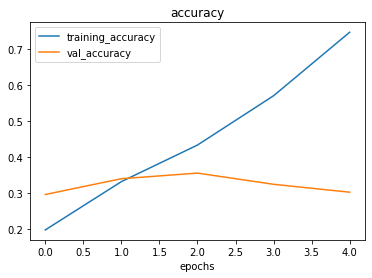

In [26]:
plot_loss_curves(history_3)

In [27]:
# Augmenting model_3 for even better accuracy
train_datagen_aug2 = ImageDataGenerator(rescale=1/225.,
                                        rotation_range=20,
                                        height_shift_range=0.2,
                                        width_shift_range=0.2,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_data_aug2 = train_datagen_aug2.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [30]:
# Modelling and fitting the augmented model_3
model_4 = tf.keras.models.clone_model(model_3)
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_4 = model_4.fit(train_data_aug2,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug2),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 120s 509ms/step - loss: 2.2643 - accuracy: 0.2024 - val_loss: 2.0197 - val_accuracy: 0.2864
Epoch 2/5
235/235 [==============================] - 119s 507ms/step - loss: 2.0810 - accuracy: 0.2556 - val_loss: 1.9649 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 119s 504ms/step - loss: 2.0597 - accuracy: 0.2705 - val_loss: 1.9706 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 119s 507ms/step - loss: 2.0118 - accuracy: 0.2949 - val_loss: 1.8703 - val_accuracy: 0.3728
Epoch 5/5
235/235 [==============================] - 120s 510ms/step - loss: 1.9645 - accuracy: 0.3144 - val_loss: 1.8682 - val_accuracy: 0.3568


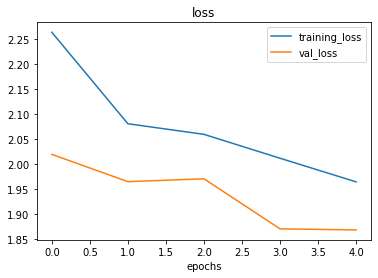

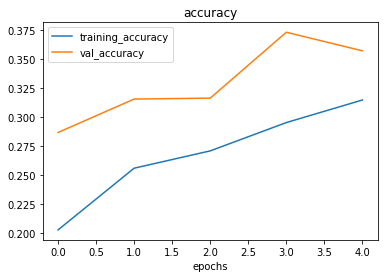

In [31]:
plot_loss_curves(history_4)

# Predictions

In [49]:
# Two functions for processing the image for predictions

def load_cook_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [50]:
def pred_plot(model, filename, class_names):
  img = load_cook_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [47]:
# Importing random images for prediction
!wget -q https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/01-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/02-chicken_curry.jpeg
!wget -q https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/03-pizza.jpeg
!wget -q https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/04-steak.jpeg
!wget -q https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/05-grilled_salmon.jpeg

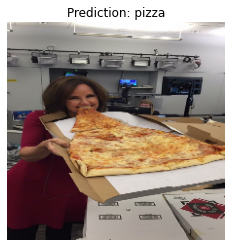

In [66]:
pred_plot(model_2, "03-pizza.jpeg", class_names) # model_4 couldn't predict it right so used model_2 for fun

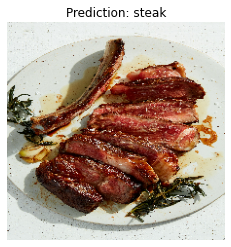

In [67]:
pred_plot(model_4, "04-steak.jpeg", class_names)

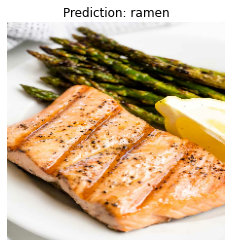

In [74]:
pred_plot(model_4, "05-grilled_salmon.jpeg", class_names) # grilled salmon look confusing to human eye too

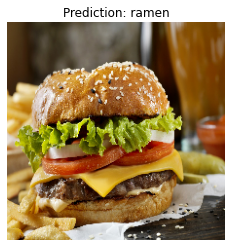

In [78]:
pred_plot(model_4, "iStock-1152247466.jpg", class_names) # wow! looks like transfer learning is needed

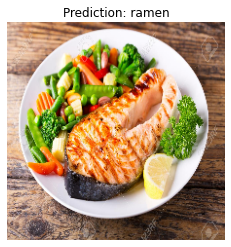

In [80]:
pred_plot(model_4, "81785290-plate-of-grilled-salmon-steak-with-vegetables-on-wooden-table.jpg", class_names)

- Transfer learning might have better results because this dataset is limited and small.
- Bigger dataset will help training and reduce overfitting.